# Задание 01

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sci
import networkx as nx 

Будем работать с сетью, описывающую взаимосвязи между различными заболеваниями, подробнее про данные можно почитать в [статье](https://www.pnas.org/content/pnas/104/21/8685.full.pdf).

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bio-diseasome.txt to bio-diseasome.txt
User uploaded file "bio-diseasome.txt" with length 8978 bytes


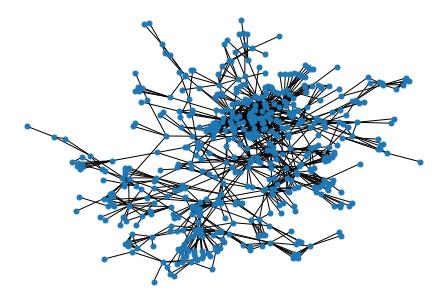

In [4]:
G=nx.read_edgelist('bio-diseasome.txt', nodetype=int)

pos=nx.spring_layout(G,iterations=20)
nx.draw(G,pos,node_size=25,with_labels=False)

## Ответьте на следующие вопросы, ответы введите используя [гугл-форму](https://goo.gl/forms/MLAvh3oe0VN6B9fJ3)

**1. Чему равно число вершин, число ребер в сети?**

In [ ]:
print("Количество вершин: %d" % nx.number_of_nodes(G))
print("Количество ребер: %d" % nx.number_of_edges(G))

Количество вершин: 516
Количество ребер: 1188


**2. Является ли сеть направленной?**

In [ ]:
nx.is_directed(G)

False

**3. Чему равна средняя степень вершины?**

In [4]:
degrees=[d for node, d in G.degree()]
print("Средняя степень узлов:", np.mean(degrees))

Средняя степень узлов: 4.604651162790698


**4. Перечислите индексы узлов с максимальным значением степени.**

In [ ]:
print("Максимальная степень узла:", max(degrees))

Максимальная степень узла: 50


In [95]:
arr_degree = [node for node, degree in G.degree() if degree == max(degrees)]
print(arr_degree)

[93]


**5. Постройте распределение по степеням связности и огибающую распределения в двойном логарифмическом масштабе.**

Не забудьте подписать оси. Используйте plt.subplots, чтобы получить одну картинку. Картинку сохраните в формате "Фамилия05.png"

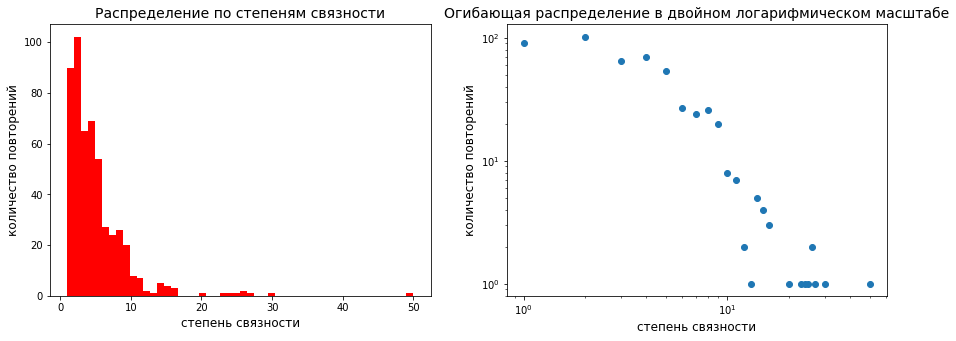

In [64]:
arr_plot=np.bincount(degrees)
x=np.nonzero(arr_plot)
y=arr_plot[np.nonzero(arr_plot)]

fig, ax = plt.subplots(nrows=1, sharey=False,ncols=2, figsize=(15, 5))
ax[0].hist(degrees, bins = 'auto',color = 'r')
ax[0].set_xlabel('степень связности', fontsize=12)
ax[0].set_ylabel('количество повторений', fontsize=12)
ax[0].set_title('Распределение по степеням связности', fontsize=14)

ax[1].scatter(x,y)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('степень связности', fontsize=12)
ax[1].set_ylabel('количество повторений', fontsize=12)
ax[1].set_title('Огибающая распределение в двойном логарифмическом масштабе', fontsize=14)

plt.show()

**6. Сколько вершин имеют степень больше 20?** 

In [70]:
arr = [i for i in degrees if i > 20]
print('Количество вершин имеющих степень строго больше 20: ',len(arr))

Количество вершин имеющих степень строго больше 20:  8


**7. Напишите функцию sorted_degree(). 
Функция сортирует пары (index_node, degree) по значению степени в убывающем порядке. 
Выведите топ-10 вершин с наибольшей степенью.** 

In [ ]:
def sorted_degree(G):
  arr_node1 = []
  arr_degree1 = []
  arr_final = []
  for node, degree in G.degree():
    arr_node1.append(node)
    arr_degree1.append(degree)
  new_dict = {k: v for k, v in zip(arr_node1, arr_degree1)}
  for w in sorted(new_dict, key=new_dict.get, reverse=True):
    arr_final.append((w, new_dict[w]))
  return arr_final[:10]

sorted_degree(G)

[(93, 50),
 (71, 30),
 (163, 27),
 (252, 26),
 (457, 26),
 (113, 25),
 (121, 24),
 (357, 23),
 (389, 20),
 (186, 16)]

здесь нет (329, 26), (66, 25), (110, 25)

**8. Сколько всего треугольников в сети?**

In [ ]:
print(nx.triangles(G))

{344: 0, 1: 0, 168: 0, 287: 17, 2: 0, 30: 6, 44: 1, 53: 7, 91: 0, 225: 10, 226: 0, 259: 10, 307: 10, 365: 10, 384: 6, 390: 10, 401: 6, 500: 0, 187: 9, 3: 1, 84: 9, 94: 6, 204: 7, 299: 27, 317: 1, 424: 1, 476: 2, 503: 6, 366: 1, 490: 1, 194: 1, 4: 1, 39: 6, 209: 1, 243: 10, 5: 10, 349: 11, 430: 10, 441: 13, 478: 10, 143: 4, 438: 1, 113: 24, 275: 0, 346: 3, 484: 3, 48: 4, 6: 3, 122: 3, 244: 1, 437: 1, 230: 0, 391: 0, 66: 38, 7: 21, 71: 97, 87: 21, 93: 152, 99: 1, 110: 50, 213: 21, 252: 35, 264: 11, 297: 21, 357: 74, 400: 0, 442: 10, 453: 21, 457: 90, 11: 11, 12: 15, 13: 15, 65: 3, 75: 23, 77: 3, 120: 15, 137: 43, 147: 1, 162: 15, 163: 69, 165: 17, 169: 32, 186: 51, 188: 45, 256: 49, 261: 1, 265: 34, 266: 21, 282: 10, 290: 6, 298: 23, 314: 45, 318: 1, 321: 29, 333: 11, 342: 0, 354: 49, 355: 42, 377: 3, 381: 3, 397: 11, 410: 0, 423: 6, 451: 5, 463: 19, 475: 8, 493: 45, 511: 45, 38: 28, 61: 28, 106: 28, 107: 28, 233: 29, 372: 29, 411: 28, 269: 4, 8: 0, 95: 8, 111: 2, 151: 3, 183: 3, 315: 3,

In [ ]:
all_cliques= nx.enumerate_all_cliques(G)
triad_cliques=[x for x in all_cliques if len(x)==3 ]
len(triad_cliques)

1360

**9. Чему равен средний коэффициент кластеризации в сети? (ответ округлите до сотых)**

In [81]:
nx.average_clustering(G)

0.6358304997771197

In [90]:
round(nx.average_clustering(G),2)

0.64

**10. А чему равен коэффициент транзитивности сети? (ответ округлите до сотых)**

Если он меньше или больше среднего коэффициента кластеризации, подумайте, что это может означать.

In [89]:
round(nx.transitivity(G),2)

0.43

**11. Сколько процентов узлов из имеющих максимальную кластеризацию имеют степень два (т.е. являются вершинами треугольников)? (ответ округлите до целого)**

In [87]:
clast_max = max(nx.clustering(G,G.nodes()).values())
cl = nx.clustering(G,G.nodes())
arr_c1 = [node for node, clust in cl.items() if clust == clast_max]
arr_c2 = [node for node, degree in G.degree(arr_c1) if degree == 2]
count_all = len(arr_c1)
count = len(arr_c2)
print(round(count/count_all * 100))

36


**12. Какова максимальная степень вершины с  минимальной кластеризацией ($C_i=0$)?**

In [77]:
clust = nx.clustering(G)
arr_clust = [node for node, claster in clust.items() if claster == 0]
arr_clust.sort()
degree_clust=[d for node, d in G.degree(arr_clust)]
print(max(degree_clust))

5


**13. Какова кластеризация хаба (вершины с максимальной степенью)? (ответ округлите до сотых)**

In [88]:
round(nx.clustering(G,93),2)

0.12

**14. Постройте диаграмму рассеяния, по оси $Ox$ - значение степени узла, по оси $Oy$ - его коэффициент кластеризации.** 
Картинку сохраните в формате "Фамилия14.png"


In [19]:
nodes = [i for i in G.nodes()]
nodes.sort()

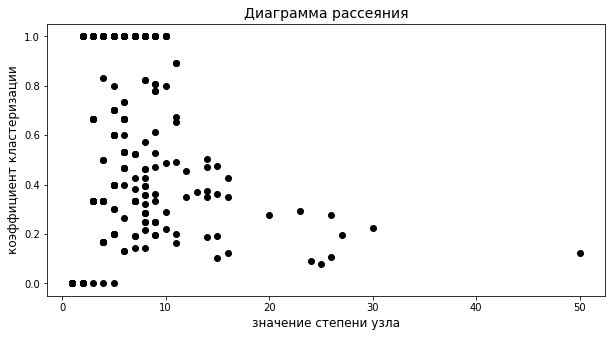

In [20]:
x_set = []
y_set = []
for i in nodes:
  degree = G.degree(i)
  clustering = nx.clustering(G,i)
  x_set.append(degree)
  y_set.append(clustering)

fig = plt.figure(figsize=(10,5))
plt.scatter(x_set, y_set, color = 'black')
plt.xlabel('значение степени узла', fontsize=12)
plt.ylabel('коэффициент кластеризации', fontsize=12)
plt.title('Диаграмма рассеяния', fontsize=14)
plt.show()

**15. Верно ли, что все узлы с кластеризацией, превышающей среднее значение, имеют степень меньше 16?**

In [78]:
m = nx.average_clustering(G)
qwe1 = [i for i in nodes if nx.clustering(G,i) > m]
qwe2 = [i for i in qwe1 if G.degree(i) > 16]
qwe2

[]

Значит верно 

**16. Чему равен средний кратчайший путь в сети? (ответ округлите до десятых)**

In [91]:
print("средний кратчайший путь в сети: %s" % round(nx.average_shortest_path_length(G),1))

средний кратчайший путь в сети: 6.5


**17. А чему равен средний путь от хаба до всех остальных вершин? (ответ округлите до десятых)**

In [30]:
arr_hab = []
for i in nodes:
  if i != 93:
    a = nx.shortest_path_length(G,93,i)
    arr_hab.append(a)
round(np.average(arr_hab),1)

4.4

**18. Чему равен диаметр сети?** 

In [ ]:
print("диаметр сети: %d" % nx.diameter(G))

диаметр сети: 15


**19. Между какой парой вершин (i,j) ($i\ne j$) число путей длины 4 наибольшее?**

In [14]:
adjacency_matrix = nx.adjacency_matrix(G, nodelist=None) 
matr = adjacency_matrix ** 4
matr = matr - np.zeros(nx.number_of_nodes(G)) 
np.fill_diagonal(matr, 0) 
matr = sci.sparse.csr_matrix(matr) 
matr = np.array(sci.sparse.find(matr)) 
n = matr[:,np.argmax(matr[2])][:-1].astype(int) 
list(np.array(G.nodes)[n])

[93, 71]

**20. Визуализация сети.**

Представьте структуру сети на ваше усмотрение. Например, можно воспользоваться nx.draw, изменив параметры отрисовки. Можно размер (цвет) вершин сделать зависимым от некоторой топологической характеристики сети (степень, кластеризация и т.п.)

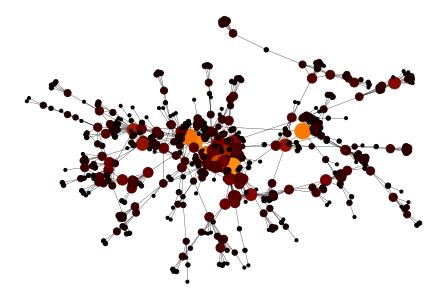

In [115]:
def draw_(G,pos, metrics):
    options = {
    'with_labels':False,
    'node_color': [10 * v for v in metrics],
    'node_size': [10 * v for v in metrics],
    'linewidths': 0.9,
    'width': 0.3,
    'cmap': 'afmhot'
    }
    nx.draw(G,pos, **options)

pos=nx.spring_layout(G)

draw_(G,pos,degrees)